# Model Building

## 1.0 About author
- `Author:` Muhammad Waqas
- `Code Submision Date:` 06-12-2024  
- `Email:` waqasliaqat630@gmailcom
- [Linkedin](www.linkedin.com/in/muhammad-waqas-liaqat)
- [Github](https://github.com/waqas-liaqat)
- [kaggle](https://www.kaggle.com/muhammadwaqas630)

## 2.0 Obective:
- To find best model with best parameters with more accuracy

## 3.0 Import Libraries

In [45]:
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
# For Pipeline
from sklearn.pipeline import Pipeline
# Column Transformer
from sklearn.compose import ColumnTransformer
# For scaling
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
# For Encoding
from sklearn.preprocessing import OneHotEncoder
# For train test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# metrics
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score
# To handle imbalanced dataset
from imblearn.under_sampling import RandomUnderSampler
# to interpret model
import shap
# pickle
import pickle
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 4.0 Load Dataset

In [46]:
# load dataset
df=pd.read_csv("cleaned_data.csv")

## 5.0 Sneak Peak of dataset

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroups,BalanceCategory
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,31-45,No Balance
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,31-45,50k-100k
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,31-45,>150k
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-45,No Balance
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,31-45,100k-150k


## 6.0 Information of dataset

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  AgeGroups        10000 non-null  object 
 12  BalanceCategory  10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


## 7.0 Train-Test Split

In [49]:
# Split into X and y
X=df.drop("Exited", axis=1)
y=df["Exited"]

In [50]:
# Train-Test_Split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

## 8.0 Scaling and Encoding

In [51]:
x_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'AgeGroups', 'BalanceCategory'],
      dtype='object')

In [52]:
# Define features
numeric_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender','AgeGroups', 'BalanceCategory' ]

# Preprocessing for numeric features: Scaling
numeric_transformer = MinMaxScaler()

# Label Encoding function for categorical features
cat_encoder=OneHotEncoder()

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', cat_encoder, categorical_features)
    ]
)
# Fit the preprocessor to the training data
preprocessor.fit(x_train, y_train)

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['CreditScore', 'Age', 'Balance',
                                  'EstimatedSalary']),
                                ('cat', OneHotEncoder(),
                                 ['Geography', 'Gender', 'AgeGroups',
                                  'BalanceCategory'])])

In [53]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,AgeGroups,BalanceCategory
4901,673,France,Male,59,0,178058.06,2,0,1,21063.71,46-60,>150k
4375,850,Germany,Male,41,8,60880.68,1,1,0,31825.84,31-45,50k-100k
6698,725,France,Female,31,6,0.00,1,0,0,61326.43,31-45,No Balance
9805,644,France,Male,33,7,174571.36,1,0,1,43943.09,31-45,>150k
1101,703,Spain,Male,29,9,0.00,2,1,0,50679.48,18-30,No Balance


## 9.0 Under Sampling

- I explored various approaches for imbalanced dataset, and undersampling consistently delivered the most optimal results.

In [54]:
sampler=RandomUnderSampler(random_state=42)
res_x,res_y=sampler.fit_resample(x_train, y_train)

## 10 Hyper parameter tuning and Model Selection

- Since the focus is on customer churn prediction, it is crucial to train the model with an emphasis on maximizing recall to effectively identify potential churners.

In [55]:
# Initialize tracking variables
best_recall = 0
best_model_name = None
best_parameters = None
best_model = None

# Define models and hyperparameters
models = { 
    "Logistic Regression": (LogisticRegression(random_state=42), {}),
    "Decision Tree": (DecisionTreeClassifier(random_state=42),
                      {'model__max_depth': [3, 5, 10, 20], 'model__splitter': ['best', 'random']}),
    "Random Forest": (RandomForestClassifier(random_state=42),
                      {'model__n_estimators': [10, 100, 1000], 'model__max_depth': [5, 10]}),
    "Ada Boost": (AdaBoostClassifier(random_state=42),
                  {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.1, 0.5, 1]}),
    "Gradient Boost": (GradientBoostingClassifier(random_state=42),
                       {'model__n_estimators': [10, 100, 1000]}),
    "XGBoost": (XGBClassifier(random_state=42),
            {'model__n_estimators': [10, 100, 1000],
             'model__learning_rate': [0.1, 0.01, 0.001],
             'model__max_depth': [3, 5, 7],
             'model__subsample': [0.8, 1.0],
             'model__colsample_bytree': [0.8, 1.0]})
}

# Iterate through models
for name, (model, params) in models.items():
    try:
        # Create a pipeline: Preprocessor + Model
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        # Perform Grid Search
        grid_search = GridSearchCV(pipeline, params, cv=5, scoring='recall')
        grid_search.fit(res_x, res_y)

        # Make predictions on the test set
        y_predict = grid_search.best_estimator_.predict(x_test)
        recall = recall_score(y_test, y_predict)

        print(f"Model: {name}")
        print(f"Cross-Validation Best Score: {grid_search.best_score_:.4f}")
        print(f"Test Recall: {recall:.4f}")
        print(f"Best Parameters: {grid_search.best_params_}\n")

        # Track the best model
        if recall > best_recall:
            best_recall = recall
            best_model_name = name
            best_parameters = grid_search.best_params_
            best_model = grid_search.best_estimator_

    except Exception as e:
        print(f"Error for model {name}: {e}")

# Final results
print(f"Best Model: {best_model_name}")
print(f"Best Recall: {best_recall:.4f}")
print(f"Best Parameters: {best_parameters}")

# Save the final pipeline with the best model
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model.named_steps['model'])  # Extract the model part of the pipeline
])

Model: Logistic Regression
Cross-Validation Best Score: 0.6364
Test Recall: 0.6620
Best Parameters: {}

Model: Decision Tree
Cross-Validation Best Score: 0.7403
Test Recall: 0.7264
Best Parameters: {'model__max_depth': 3, 'model__splitter': 'best'}

Model: Random Forest
Cross-Validation Best Score: 0.6786
Test Recall: 0.6801
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 1000}

Model: Ada Boost
Cross-Validation Best Score: 0.6584
Test Recall: 0.6821
Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 200}

Model: Gradient Boost
Cross-Validation Best Score: 0.6903
Test Recall: 0.7082
Best Parameters: {'model__n_estimators': 100}

Model: XGBoost
Cross-Validation Best Score: 0.7279
Test Recall: 0.7264
Best Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.001, 'model__max_depth': 3, 'model__n_estimators': 10, 'model__subsample': 1.0}

Best Model: Decision Tree
Best Recall: 0.7264
Best Parameters: {'model__max_depth': 3, 'model__spli

## 11 Training Best Model with paramters and Assumptions

In [56]:
# Fit the final pipeline
final_pipeline.fit(res_x, res_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Balance',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Geography', 'Gender',
                                                   'AgeGroups',
                                                   'BalanceCategory'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [57]:
# Stores prediction of test data
y_predict=final_pipeline.predict(x_test)

In [58]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2003
           1       0.38      0.73      0.50       497

    accuracy                           0.71      2500
   macro avg       0.65      0.72      0.65      2500
weighted avg       0.81      0.71      0.74      2500



In [59]:
accuracy_score(y_test,y_predict)

0.7116

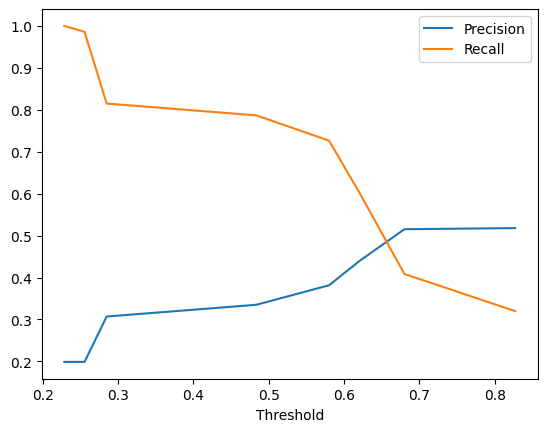

In [60]:
y_probs = final_pipeline.predict_proba(x_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

In [62]:
# Save the pipeline for later use
with open('model.pkl','wb') as file:
    pickle.dump(final_pipeline, file)
print("Final pipeline saved as 'model.pkl'")

Final pipeline saved as 'model.pkl'


## 12. Conclusion

This notebook has successfully demonstrated the process of building a predictive model for customer churn using various machine learning techniques. The workflow included:
- Data Preparation: Essential libraries were imported, and the dataset was loaded and explored to understand its structure and key features influencing churn.
- Model Implementation: A range of classification algorithms, including Logistic Regression, Decision Trees, Random Forests, AdaBoost, Gradient Boosting, and XGBoost, were applied to the dataset. Each model was evaluated using performance metric recall score.
- Addressing Imbalanced Data: Techniques such as Random Under Sampling were utilized to tackle class imbalance, ensuring that the models could learn effectively from the data.
- Performance Assessment: The models were rigorously assessed, revealing insights into their predictive capabilities regarding customer churn. This evaluation highlighted which algorithms performed best under the given conditions.

`In summary`, this analysis provides valuable insights for businesses seeking to enhance customer retention strategies by identifying at-risk customers through predictive analytics. Future work may include further optimization of model parameters and exploration of additional features to improve prediction accuracy.